In [344]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [345]:
#generate testing num
def gen_num():
    np.random.seed(10)
    a=np.random.randint(0,15,(1,15))
    return a

In [346]:
def layer(output_dim,input_dim,inputs,activation):
    w=tf.Variable(tf.random_normal([input_dim,output_dim]))
    b=tf.Variable(tf.random_normal([1,output_dim]))
    xwb=tf.matmul(inputs,w)+b
    if activation is None:
        outputs=xwb
    else:
        outputs=activation(xwb)
    return outputs

In [347]:
x=tf.placeholder("float",[None,15])
h1=layer(output_dim=8,input_dim=15,inputs=x,activation=tf.nn.relu)
pred=layer(output_dim=15,input_dim=8,inputs=h1,activation=None)

In [348]:
pred.shape

TensorShape([Dimension(None), Dimension(15)])

[[  4.   2.   3.   6.   5.   8.  10.   9.  13.  17.  19.  20.  22.  17.
   15.]]


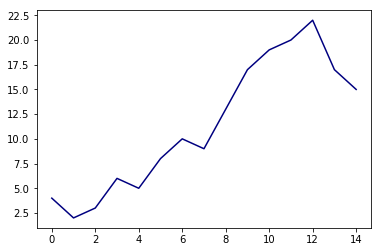

In [349]:
%matplotlib inline
#data=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#data=np.vstack((data,gen_num()))
#print(data[1])
data=[[4,2,3,6,5,8,10,9,13,17,19,20,22,17,15]]
data = np.array(data, dtype=np.float32)
print (data)
plt.plot(data[0],color='navy')

In [350]:
#define training
loss_function = tf.losses.mean_squared_error(data, pred)
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [351]:
trainEpochs=1000
epoch_list=[];loss_l=[]
from time import time
startTime=time()

sess=tf.Session()
sess.run(tf.global_variables_initializer())

<IPython.core.display.Javascript object>


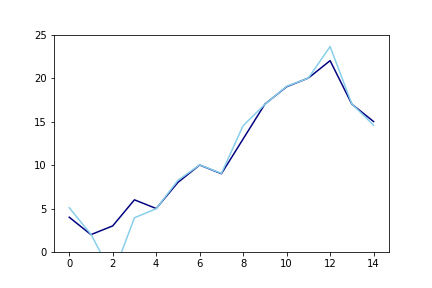

Loss= 2.69305
Training Takes: 5.287580966949463


<IPython.core.display.Javascript object>


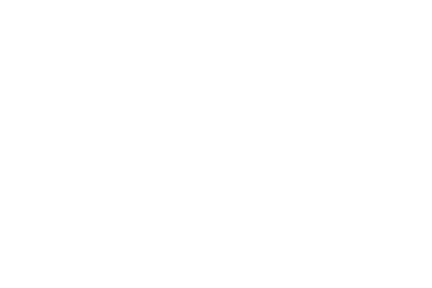

In [352]:
%matplotlib notebook

fig=plt.figure()
ax= fig.add_subplot(111)
line1, = ax.plot(data[0],color='navy')
line2, = ax.plot(data[0],color='skyblue')
plt.ylim((0,25))
plt.ion()
a=gen_num()

for epoch in range(trainEpochs): 
    sess.run(optimizer,feed_dict={x:a})
    loss=sess.run(loss_function,feed_dict={x:a})
    epoch_list.append(epoch)
    loss_l.append(loss)
    
    if epoch%10==0:
        test_pred=sess.run(pred,feed_dict={x:a})
        line2.set_ydata(test_pred.reshape(-1,1))
        fig.canvas.draw()   
    #print ("Train Epoch:",'%02d'%(epoch+1),"Loss=",loss)
sess.close()
print("Loss=",loss)    
duration=time()-startTime
print("Training Takes:", duration)

    

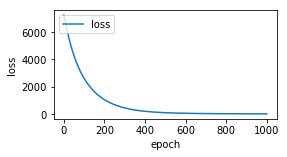

In [353]:
%matplotlib inline
fig=plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_l,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')